<a href="https://colab.research.google.com/github/taylorec/Data-Structures-and-Algorithms-with-Python/blob/main/1)_Linked_Lists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nodes

A node is a key component of several data structures such as linked lists. A node is a container of data, together with one or more links to other nodes where a link is a pointer.

In [ ]:
class Node:
    """ A singly-linked node. """
    def __init__(self, data=None):
        self.data = data
        self.next = None

### Singly linked lists

A linked  list contains a number of nodes in which each node contains data  and a pointer that links to the next node.
A singly linked list is a list with only one pointer between two successive nodes. It can only be traversed in a single direction, that is, you can go from the first node in the list to the last node, but you cannot move from the last node to the first node. The link of the last node in the list is None, which indicates the end of the list.

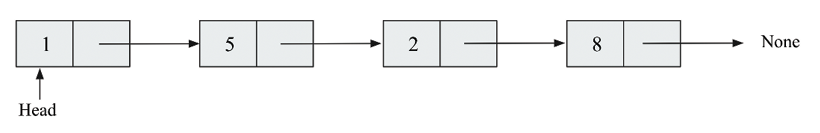

In [ ]:
class SinglyLinkedList:
    """ A singly-linked list. """
    def __init__(self):
        """ Create an empty list. """
        self.tail = None
        self.head = None
        self.count = 0

    def iter(self):
        """ Iterate through the list. """
        current = self.tail
        while current:
            val = current.data
            current = current.next
            yield val

    def append(self, data):
        """ Append an item to the list """
        node = Node(data)
        if self.head:
            self.head.next = node
            self.head = node
        else:
            self.tail = node
            self.head = node
        self.count += 1

    def delete(self, data):
        """ Delete a node from the list """
        current = self.tail
        prev = self.tail
        while current:
            if current.data == data:
                if current == self.tail:
                    self.tail = current.next
                else:
                    prev.next = current.next
                self.count -= 1
                return
            prev = current
            current = current.next

    def search(self, data):
        """ Search through the list. Return True if data is found, otherwise
        False. """
        for node in self.iter():
            if data == node:
                return True
        return False

    def __getitem__(self, index):
        if index > self.count - 1:
            raise Exception("Index out of range.")
        current = self.tail
        for n in range(index):
            current = current.next
        return current.data

    def __setitem__(self, index, value):
        if index > self.count - 1:
            raise Exception("Index out of range.")
        current = self.tail
        for n in range(index):
            current = current.next
        current.data = value

In [ ]:
words = SinglyLinkedList()
words.append('egg')
words.append('ham')
words.append('spam')
words.append('foo')
words.append('bar')
words.append('bim')
words.append('baz')
words.append('quux')

In [ ]:
print("This list has {} elements.".format(words.count))
for word in words.iter():
    print("Got this data: {}".format(word))

This list has 8 elements.
Got this data: egg
Got this data: ham
Got this data: spam
Got this data: foo
Got this data: bar
Got this data: bim
Got this data: baz
Got this data: quux


In [ ]:
print("access by index")
print("here is a node: {}".format(words[1]))

access by index
here is a node: ham


In [ ]:
print("modify by index")
words[4] = "Quux"
print("Modified node by index: {}".format(words[4]))

modify by index
Modified node by index: Quux


In [ ]:
print("This list has {} elements.".format(words.count))
for word in words.iter():
    print("Got this data: {}".format(word))

This list has 8 elements.
Got this data: egg
Got this data: ham
Got this data: spam
Got this data: foo
Got this data: Quux
Got this data: bim
Got this data: baz
Got this data: quux


In [ ]:
if words.search('foo'):
    print("Found foo in the list.")
else:
    print("foo not in the list")

if words.search('amiga'):
    print("Found amiga in the list.")
else:
    print("amiga not in the list")

Found foo in the list.
amiga not in the list


In [ ]:
print("Now we try to delete an item")
words.delete('bim')
print("List now has {} elements".format(words.count))
for word in words.iter():
    print("data: {}".format(word))

Now we try to delete an item
List now has 7 elements
data: egg
data: ham
data: spam
data: foo
data: Quux
data: baz
data: quux


In [ ]:
print("delete the first item in the list")
words.delete(words[0])
print("size: {}".format(words.count))
for word in words.iter():
    print("data: {}".format(word))

delete the first item in the list
size: 6
data: ham
data: spam
data: foo
data: Quux
data: baz
data: quux


In [ ]:
print("delete the last item in the list")
words.delete(words[words.count-1])
print("size: {}".format(words.count))
for word in words.iter():
    print("data: {}".format(word))

delete the last item in the list
size: 5
data: ham
data: spam
data: foo
data: Quux
data: baz


### Doubly linked lists

Doubly linked lists have two pointers—a pointer to the next node and a pointer to the previous node.

In [ ]:
class Node(object):
    """ A Doubly-linked lists' node. """
    def __init__(self, data=None, next=None, prev=None):
        self.data = data
        self.next = next
        self.prev = prev

In [ ]:
class DoublyLinkedList(object):
    def __init__(self):
        self.head = None
        self.tail = None
        self.count = 0

    def append(self, data):
        """ Append an item to the list. """

        new_node = Node(data, None, None)
        if self.head is None:
            self.head = new_node
            self.tail = self.head
        else:
            new_node.prev = self.tail
            self.tail.next = new_node
            self.tail = new_node

        self.count += 1

    def iter(self):
        """ Iterate through the list. """
        current = self.head #note subtle change
        while current:
            val = current.data
            current = current.next
            yield val

    def reverse_iter(self):
        """ Iterate backwards through the list. """
        current = self.tail
        while current:
            val = current.data
            current = current.prev
            yield val

    def delete(self, data):
        """ Delete a node from the list. """
        current = self.head
        node_deleted = False
        if current is None:
            node_deleted = False

        elif current.data == data:
            self.head = current.next
            self.head.prev = None
            node_deleted = True

        elif self.tail.data == data:
            self.tail = self.tail.prev
            self.tail.next = None
            node_deleted = True

        else:
            while current:
                if current.data == data:
                    current.prev.next = current.next
                    current.next.prev = current.prev
                    node_deleted = True
                current = current.next

        if node_deleted:
            self.count -= 1

    def search(self, data):
        """Search through the list. Return True if data is found, otherwise False."""
        for node in self.iter():
            if data == node:
                return True
        return False

    def print_foward(self):
        """ Print nodes in list from first node inserted to the last . """
        for node in self.iter():
            print(node)

    def print_backward(self):
        """ Print nodes in list from latest to first node. """
        current = self.tail
        while current:
            print(current.data)
            current = current.prev

    def insert_head(self, data):
        """ Insert new node at the head of linked list. """

        if self.head is not None:
            new_node = Node(data, None, None)
            new_node.next = self.head
            self.head.prev = new_node
            self.head = new_node
            self.count += 1

    def reverse(self):
        """ Reverse linked list. """
        current = self.head
        while current:
            temp = current.next
            current.next = current.prev
            current.prev = temp
            current = current.prev

        # Now reverse the order of head and tail
        temp = self.head
        self.head = self.tail
        self.tail = temp

    def __getitem__(self, index):
        if index > self.count - 1:
            raise Exception("Index out of range.")
        current = self.head # Note subtle change
        for n in range(index):
            current = current.next
        return current.data

    def __setitem__(self, index, value):
        if index > self.count - 1:
            raise Exception("Index out of range.")
        current = self.head # Note subtle change
        for n in range(index):
            current = current.next
        current.data = value

In [ ]:
dll = DoublyLinkedList()
dll.append("foo")
dll.append("bar")
dll.append("biz")
dll.append("whew")
dll.append('egg')
dll.append('ham')
dll.append('spam')

In [ ]:
print("Items in List : ")
dll.print_foward()

Items in List : 
foo
bar
biz
whew
egg
ham
spam


In [ ]:
current = dll.head
while current:
    print(current.data)
    current = current.next

foo
bar
biz
whew
egg
ham
spam


In [ ]:
print("Deleting node with data whew")
dll.delete("whew")

Deleting node with data whew


In [ ]:
print("List count: {}".format(dll.count))
print("Print list backwards")
dll.print_backward()

List count: 6
Print list backwards
spam
ham
egg
biz
bar
foo


In [ ]:
print("Reverse list ")
dll.reverse()
dll.print_foward()

Reverse list 
spam
ham
egg
biz
bar
foo


In [ ]:
print("Append item to front of list")
dll.insert_head(55)
dll.print_foward()

print("Get First element: {}".format(dll[0]))

Append item to front of list
55
spam
ham
egg
biz
bar
foo
Get First element: 55


### Circular linked list

Circular linked list the endpoints are connected, which means that the last node in the list points back to the first node.

In [ ]:
class Node:
    def __init__(self, data=None):
        self.data = data
        self.next = None

In [ ]:
class CircularList:
    def __init__(self, data=None):
        self.head = None
        self.tail = None
        self.size = 0

    def clear(self):
        self.tail = None
        self.head = None

    def append(self, data):
        node = Node(data)
        if self.head:
            self.head.next = node
            self.head = node
        else:
            self.head = node
            self.tail = node
        self.head.next = self.tail
        self.size += 1

    def delete(self, data):
        current = self.tail
        prev = self.tail
        while prev == current or prev != self.head:
            if current.data == data:
                if current == self.tail:
                    self.tail = current.next
                    self.head.next = self.tail
                else:
                    prev.next = current.next
                self.size -= 1
                return
            prev = current
            current = current.next

    def iter(self):
        current = self.tail
        while current:
            val = current.data
            current = current.next
            yield val

In [ ]:
cll = CircularList()
cll.append('eggs')
cll.append('ham')
cll.append('spam')

In [ ]:
counter = 0
for word in cll.iter():
    print(word)
    counter += 1
    if counter > 10:
        break

eggs
ham
spam
eggs
ham
spam
eggs
ham
spam
eggs
ham


In [ ]:
cll.append('foo')
cll.append('boo')

In [ ]:
print("Delelete something that is there.")
cll.delete('foo')

Delelete something that is there.


In [ ]:
counter = 0
for item in cll.iter():
    print(item)
    counter += 1
    if counter > 10:
        break

eggs
ham
spam
boo
eggs
ham
spam
boo
eggs
ham
spam


In [ ]:
print("Delete something that isn't there.")
print(cll.delete('socks'))

Delete something that isn't there.
None


In [ ]:
counter = 0
for item in cll.iter():
    print(item)
    counter += 1
    if counter > 10:
        break

eggs
ham
spam
boo
eggs
ham
spam
boo
eggs
ham
spam
